## TEMA 7
### Ej 2
### Arquímedes

In [2]:
'''Calcula hasta que n hay que iterar el algoritmo para obtener que la
diferencia entre el perimetro del poligono circunscrito e inscrito < 10^-(n0)'''
s6 = 1/2
t6 = 1/sqrt(3)

def S(n):
    if n == 6:
        return 1/2
    return sqrt( T(n)*S(n/2)/2 )
def T(n):
    if n == 6:
        return 1/sqrt(3)
    return 1/( (1/T(n/2)) + (1/S(n/2)) )

def comprobar(n0) :
    n = 6
    resta = T(6) - S(6)
    while resta >= 10^(-n0):
        n = n*2
        resta = T(n) - S(n)
    return n

comprobar(3)
        

48

### Ej 3
### Euler

In [4]:
'''Esta funcion no la uso para nada, solo para saber como funcionaba
el bucle que imitaba la serie'''
def arct(x, sup):
    suma = 0
    for i in srange(0, sup+1):
        suma = suma + (-1)^i * x^(2*i + 1) / (2*i + 1)
    return suma

'''Busco funcion tal que:
   Dada precision 'prec', halle hasta que punto hay que desarrollar la serie 
   (hasta qué 'i' del sumatorio)
   (sin pasarse del limite i = sup, donde sup es un argumento de entrada)
   para alcanzar pi con esa precision para cada metodo'''
def eficiencia_normal(prec, sup):
    p = n(pi, prec = prec)
    p = p/4
    suma = 0
    x = 1
    for i in srange(0, sup+1):
        suma = suma + (-1)^i * x^(2*i + 1) / (2*i + 1)
        if p == suma:
            return i
    return -1

def eficiencia_suma(prec, sup):
    p = n(pi, prec = prec)
    p = p/4
    asuma = 0
    bsuma = 0
    a = 1/2
    b = 1/3
    for i in srange(0, sup+1):
        asuma = asuma + (-1)^i *a^(2*i + 1) / (2*i + 1)
        bsuma = bsuma + (-1)^i *b^(2*i + 1) / (2*i + 1)
        if p == (asuma + bsuma):
            return i
    return -1
pr = 18
su = 100000
show(eficiencia_suma(pr, su))
show(eficiencia_normal(pr, su))
show(p = n(pi, prec = pr))


7

71535

Usando la serie en x = 1 (método ***NORMAL***), **si queremos obtener $\pi$ con 18 bits** de precision necesitamos llevar la suma **hasta el término 71535**, y no podemos alcanzar ni siquiera 19 bits de precision llevando la suma hasta el término 100000

Sin embargo, con el método de la ***SUMA*** de las dos arcotangentes, **$\pi$ con 18 bits** de precisión se alcanza **en tan sólo los 7 primeros sumandos**

Veamos si podemos relacionar cómo crecen los sumandos necesarios en función de la precisión requerida en una gráfica:

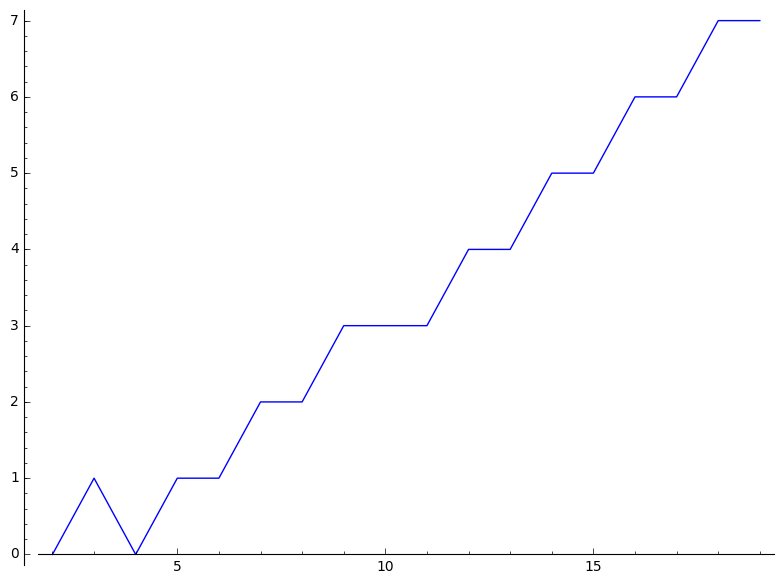

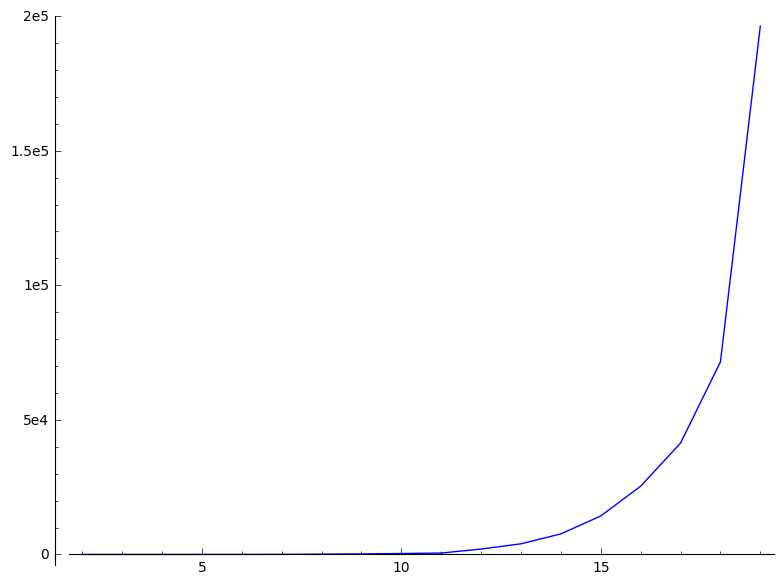

In [18]:
Lsuma = []
Lnormal = []
sup = 10000000
for prec in srange(2, 20):
    Lsuma.append((prec, eficiencia_suma(prec, sup)))
    Lnormal.append((prec, eficiencia_normal(prec, sup)))
show(line2d(Lsuma))
show(line2d(Lnormal))

Ambas gráficas muestran que con x < 1 la serie converge muchísimo más rápido a $\pi$.

Con x = 1 el crecimiento del número de sumandos que necesitamos con respecto a la precisión buscada es exponencial, y con x = 1/2, x= 1/3 la función parece una recta. ¿lo será? ¿y con qué pendiente?

Comprobamos aumentando la precisión:

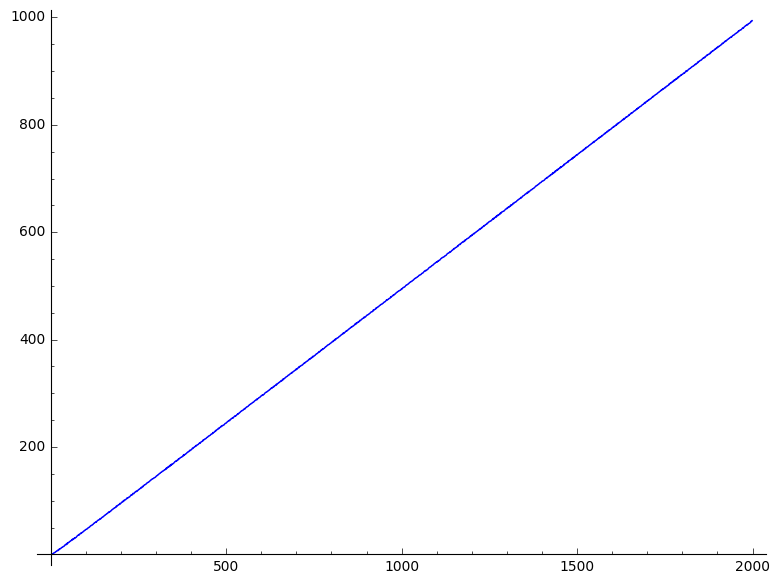

In [8]:
Lsuma = []
sup = 1000
for prec in srange(2, 2000):
    Lsuma.append((prec, eficiencia_suma(prec, sup)))

show(line2d(Lsuma))

Parece ser $f(x) = \frac{x}{2}$ :D